In [5]:
# pre setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising_file_path = '../data/08-Linear-Regression-Models/Advertising.csv'

In [3]:
advertising = pd.read_csv(advertising_file_path)

In [6]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


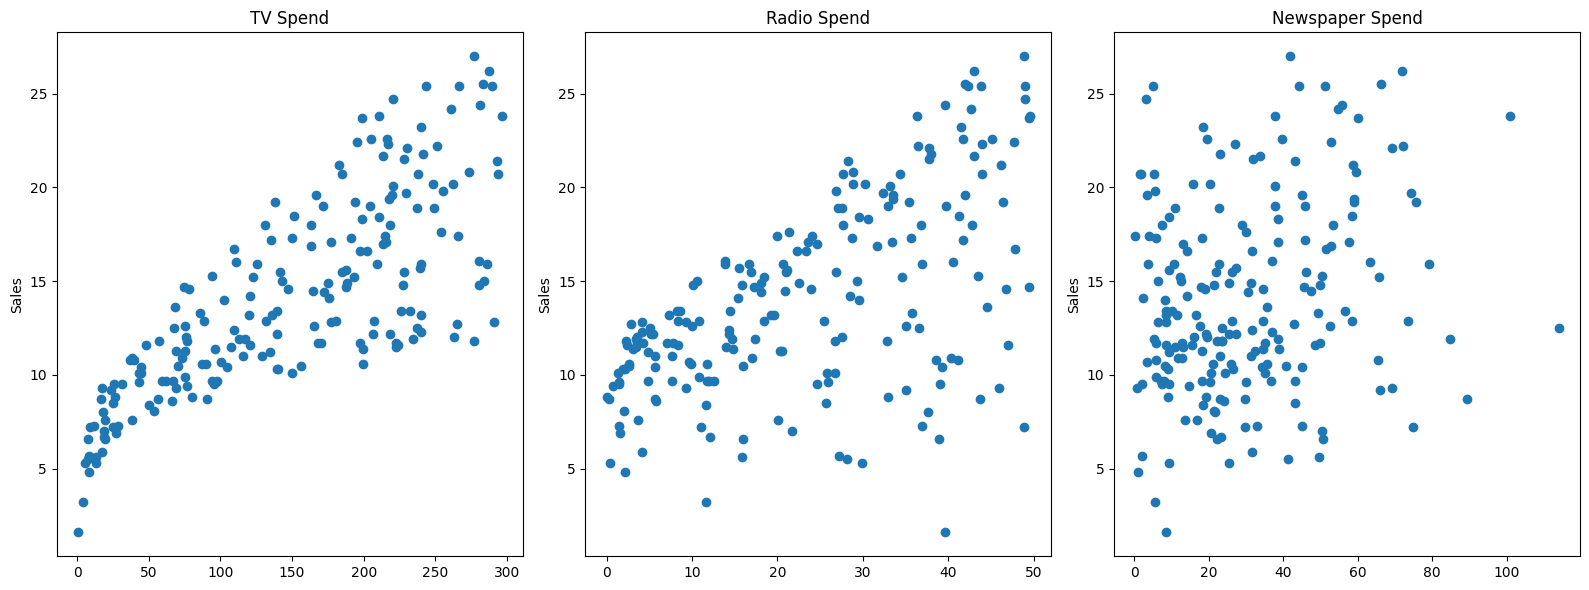

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(advertising['TV'], advertising['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title('TV Spend')

axes[1].plot(advertising['radio'], advertising['sales'], 'o')
axes[1].set_ylabel("Sales")
axes[1].set_title('Radio Spend')

axes[2].plot(advertising['newspaper'], advertising['sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

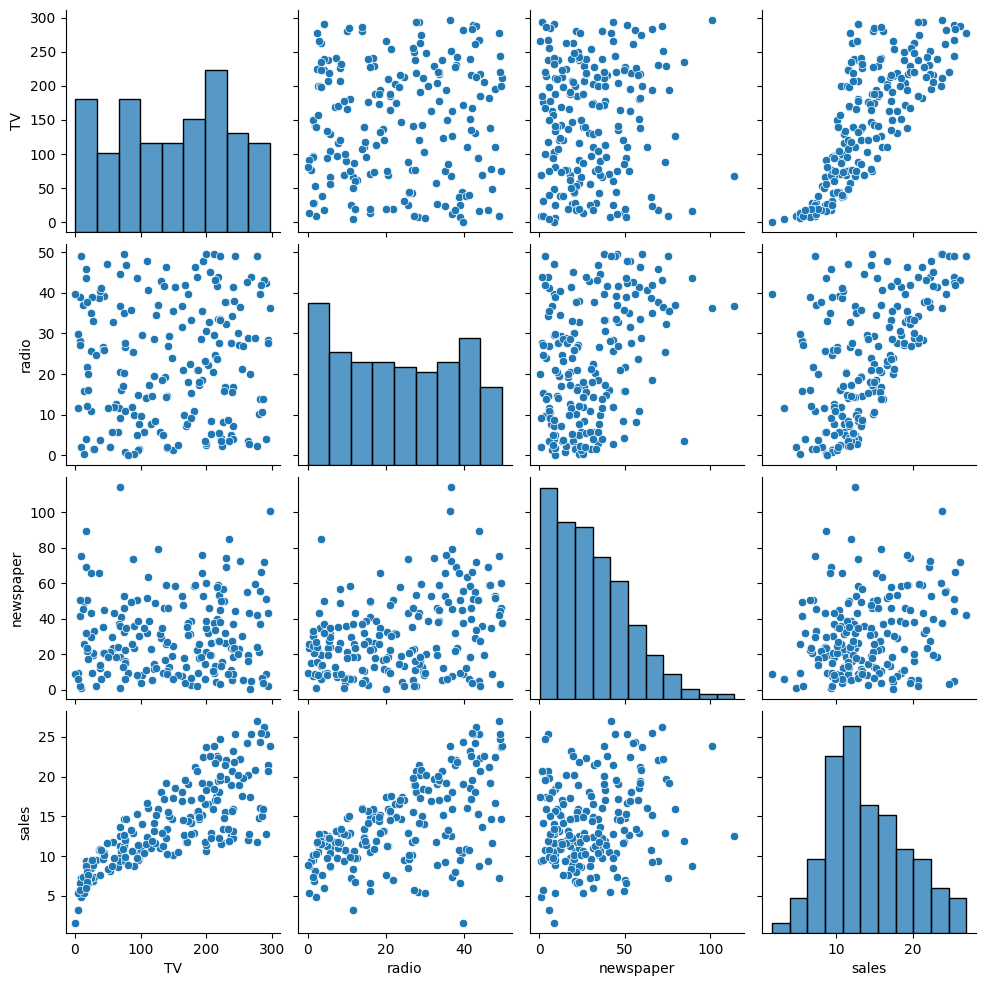

In [12]:
sns.pairplot(advertising)

In [66]:
X = advertising.drop('sales', axis=1)
y = advertising['sales']

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [21]:
len(advertising)

200

In [22]:
len(X_train)

134

In [23]:
len(X_test)

66

In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
test_predictions = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
advertising['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

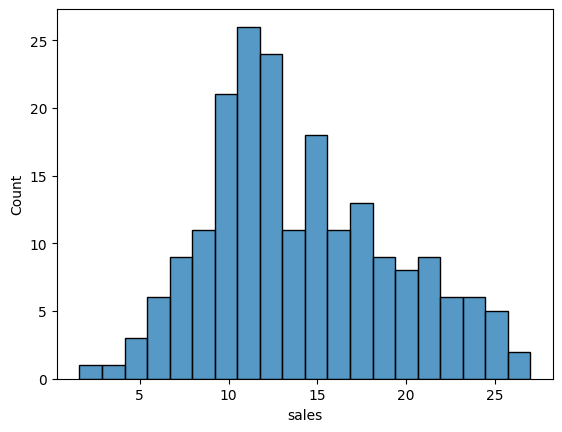

In [37]:
sns.histplot(data=advertising, x='sales', bins=20)

In [38]:
mean_absolute_error(y_test, test_predictions)

1.2369188494259313

In [40]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5324409426512422

In [41]:
test_residual = y_test - test_predictions

In [42]:
test_residual

37    -0.943438
109    0.219217
31     0.472822
89    -0.204943
66     0.323548
         ...   
183    2.282263
127    2.018084
53     1.354705
100   -2.168582
93     1.123234
Name: sales, Length: 66, dtype: float64

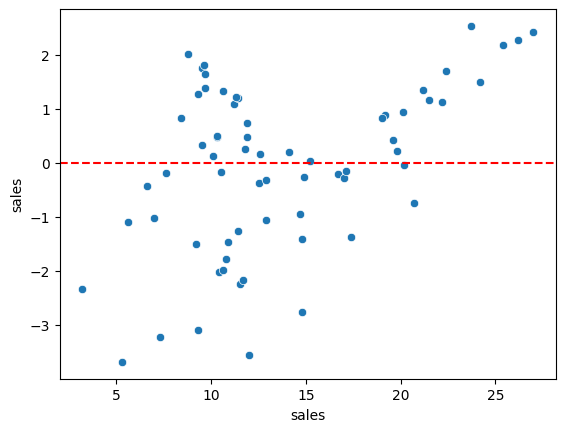

In [46]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')

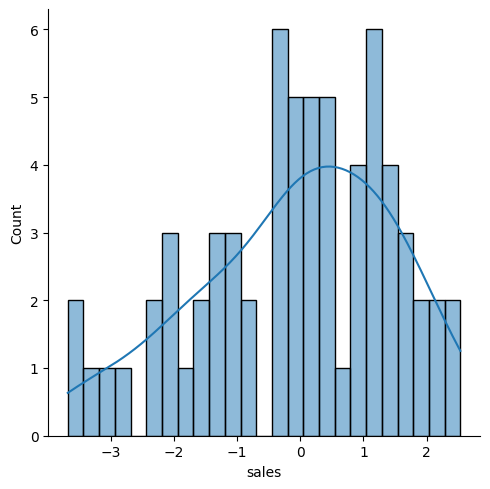

In [48]:
sns.displot(test_residual, bins=25, kde=True)

In [68]:
final_model = LinearRegression()

In [69]:
final_model.fit(X, y)

LinearRegression()

In [70]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [64]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [71]:
y_hat = final_model.predict(X)

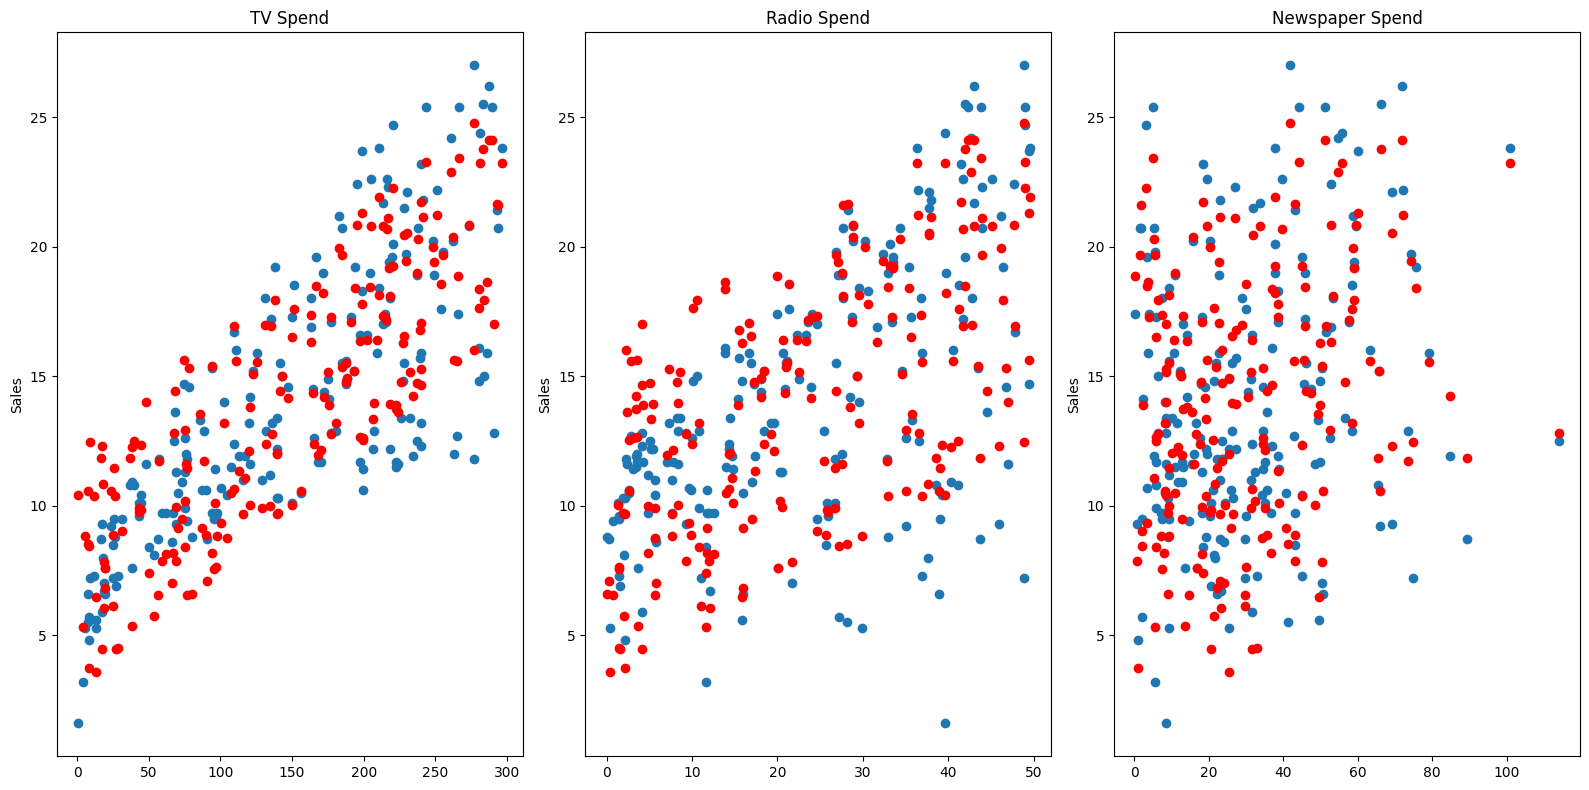

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

axes[0].plot(advertising['TV'], advertising['sales'], 'o')
axes[0].plot(advertising['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title('TV Spend')

axes[1].plot(advertising['radio'], advertising['sales'], 'o')
axes[1].plot(advertising['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title('Radio Spend')

axes[2].plot(advertising['newspaper'], advertising['sales'], 'o')
axes[2].plot(advertising['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

In [56]:
y_hat = final_model.predict(X)

In [81]:
from joblib import dump, load

In [85]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [86]:
loaded_model = load('final_sales_model.joblib')

In [87]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [88]:
X.shape

(200, 3)

In [89]:
# 149 TV, 22 Radio, 12 Newspaper
campaign = [[149, 22, 12]]

In [91]:
loaded_model.predict(campaign)

/Users/xuerong/ml/ml_playground/venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])